<a href="https://colab.research.google.com/github/fmuranda/pythia-foundations/blob/main/core/matplotlib/annotations-colorbars-layouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annotations, Colorbars, and Advanced Layouts

![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

---
## Overview

In this section we explore methods for customizing plots.  The following topics will be covered:

1. Adding annotations
1. Rendering equations
1. Colormap overview
1. Basic colorbars
1. Shared colorbars
1. Custom colorbars
1. Mosaic subplots

## Prerequisites


| Concepts | Importance | Notes |
| --- | --- | --- |
| [NumPy Basics](../numpy/numpy-basics) | Necessary | {cite:t}`harris2020array` |
| [Matplotlib Basics](matplotlib-basics) | Necessary | {cite:t}`Hunter:2007` |

- **Time to learn**: *30-40 minutes*

## Imports
Here, we import the `matplotlib.pyplot` interface and `numpy`, in addition to the `scipy` statistics package (`scipy.stats`) for generating sample data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Normalize

## Create Some Sample Data
By using `scipy.stats`, the Scipy statistics package described above, we can easily create a data array containing a normal distribution.  We can plot these data points to confirm that the correct distribution was generated. The generated sample data will then be used later in this section. The code and sample plot for this data generation are as follows:

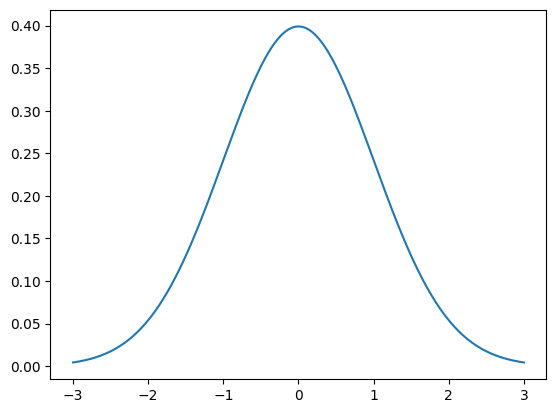

In [2]:
mu = 0
variance = 1
sigma = np.sqrt(variance)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 200)
pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf);

## Adding Annotations
A common part of many people's workflows is adding annotations.  A rough definition of 'annotation' is 'a note of explanation or comment added to text or a diagram'.

We can add an annotation to a plot using `plt.text`.  This method takes the x and y data coordinates at which to draw the annotation (as floating-point values), and the string containing the annotation text.

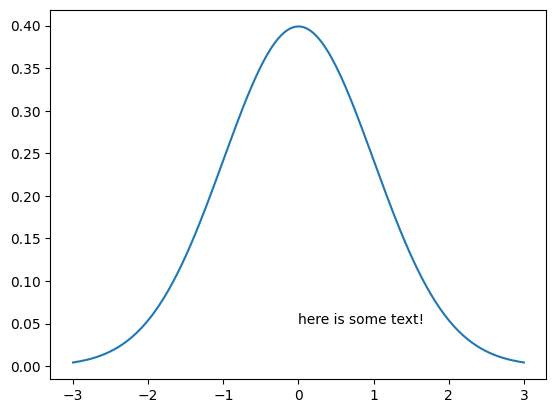

In [3]:
plt.plot(x, pdf)
plt.text(0, 0.05, 'here is some text!');

## Rendering Equations

We can also add annotations with **equation formatting**, by using LaTeX syntax.  The key is to use strings in the following format:

```python
r'$some_equation$'
```

Let's run an example that renders the following equation as an annotation:

$$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

The next code block and plot demonstrate rendering this equation as an annotation.

If you are interested in learning more about LaTeX syntax, check out [their official documentation](https://latex-tutorial.com/tutorials/amsmath/).

Furthermore, if the code is being executed in a Jupyter notebook run interactively (e.g., on Binder), you can double-click on the cell to see the LaTeX source for the rendered equation.

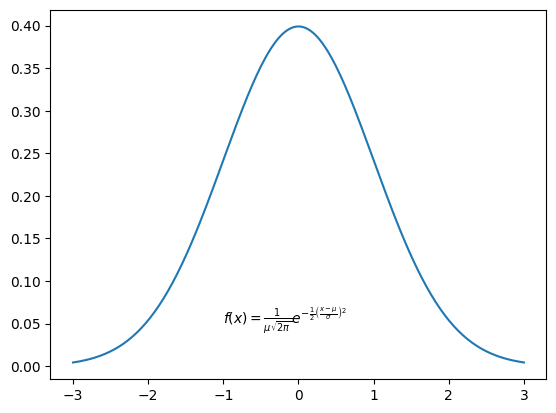

In [4]:
plt.plot(x, pdf)

plt.text(
    -1,
    0.05,
    r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$',
);

As you can see, the equation was correctly rendered in the plot above. However, the equation appears quite small.  We can increase the size of the text using the `fontsize` keyword argument, and center the equation using the `ha` (horizontal alignment) keyword argument.

The following example illustrates the use of these keyword arguments, as well as creating a legend containing LaTeX notation:

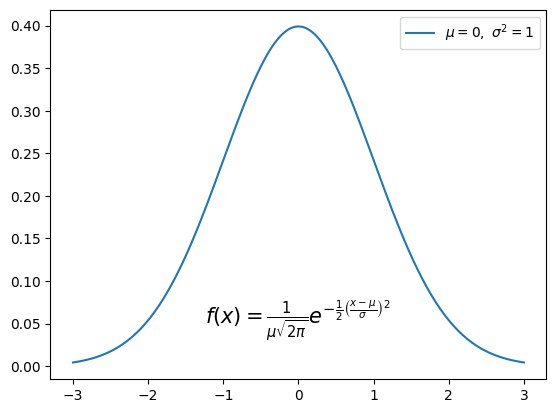

In [5]:
fstr = r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'

plt.plot(x, pdf, label=r'$\mu=0, \,\, \sigma^2 = 1$')
plt.text(0, 0.05, fstr, fontsize=15, ha='center')
plt.legend();

### Add a Box Around the Text

To improve readability, we can also add a box around the equation text.  This is done using `bbox`.

`bbox` is a keyword argument in `plt.text` that creates a box around text.  It takes a dictionary that specifies options, behaving like additional keyword arguments inside of the `bbox` argument.  In this case, we use the following dictionary keys:
* a rounded box style (`boxstyle = 'round'`)
* a light grey facecolor (`fc = 'lightgrey'`)
* a black edgecolor (`ec = 'k'`)

This example demonstrates the correct use of `bbox`:

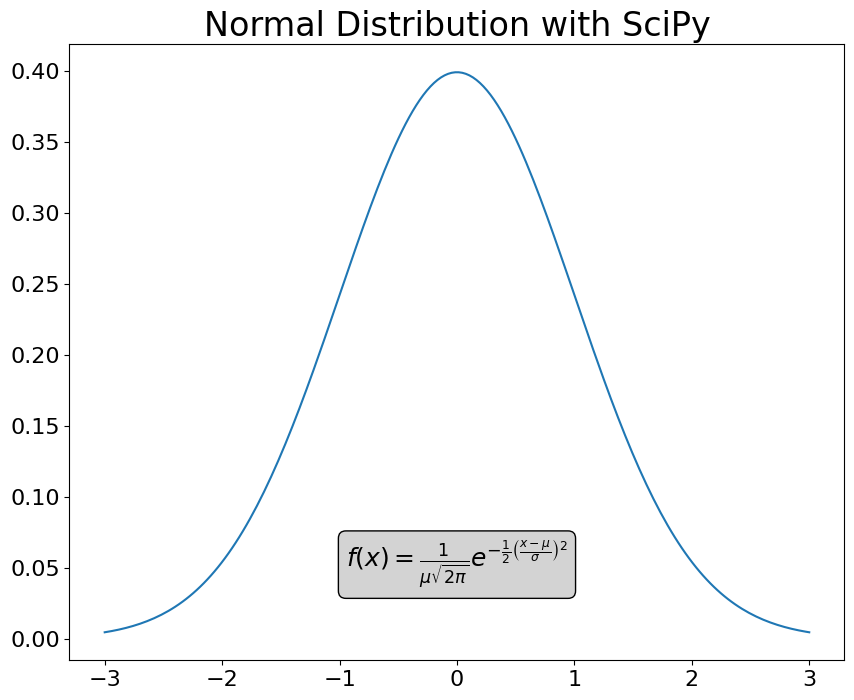

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.plot(x, pdf)

fstr = r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'
plt.text(
    0,
    0.05,
    fstr,
    fontsize=18,
    ha='center',
    bbox=dict(boxstyle='round', fc='lightgrey', ec='k'),
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Normal Distribution with SciPy", fontsize=24);

---

## Colormap Overview

Colormaps are a visually appealing method of looking at visualized data in a new and different way. They associate specific values with hues, using color to ease rapid understanding of plotted data; for example, displaying hotter temperatures as red and colder temperatures as blue.

### Classes of colormaps

There are four different classes of colormaps, and many individual maps are contained in each class.  To view some examples for each class, use the dropdown arrow next to the class name below.

<details>
<summary> 1. <b>Sequential:</b> These colormaps incrementally increase or decrease in lightness and/or saturation of color.  In general, they work best for ordered data. </summary>

![Perceptually Sequential](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/perceptually-sequential.png?raw=1)

![Sequential](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/sequential.png?raw=1)

![Sequential2](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/sequential2.png?raw=1)

![Perceptually Sequential](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/ps.png?raw=1)

![Sequential](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/s1.png?raw=1)

![Sequential2](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/s2.png?raw=1)
</details>

<details>
    <summary> 2. <b>Diverging:</b> These colormaps contain two colors that change in lightness and/or saturation in proportion to distance from the middle, and an unsaturated color in the middle.  They are almost always used with data containing a natural zero point, such as sea level. </summary>

![Diverging](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/diverging.png?raw=1)

![Diverging](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/d.png?raw=1)
</details>

<details>
    <summary> 3. <b>Cyclic:</b> These colormaps have two different colors that change in lightness and meet in the middle, and unsaturated colors at the beginning and end.  They are usually best for data values that wrap around, such as longitude. </summary>

![Cyclic](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/cyclic.png?raw=1)

![Cyclic](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/c.png?raw=1)
</details>

<details>
    <summary> 4. <b>Qualitative:</b> These colormaps have no pattern, and are mostly bands of miscellaneous colors.  You should only use these colormaps for unordered data without relationships. </summary>

![Qualitative](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/qualitative.png?raw=1)

![Miscellanous](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/misc.png?raw=1)

![Miscellanous](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/m.png?raw=1)
</details>

### Other considerations

There is a lot of info about choosing colormaps that could be its own tutorial. Two important considerations:
1. Color-blind friendly patterns: By using colormaps that do not contain both red and green, you can help people with the most common form of color blindness read your data plots more easily.  The GeoCAT examples gallery has a section about [picking better colormaps](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html#colors) that covers this issue in greater detail.
1. Grayscale conversion: It is not too uncommon for a plot originally rendered in color to be converted to black-and-white (monochrome grayscale).  This reduces the usefulness of specific colormaps, as shown below.

![hsv colormap in grayscale](https://github.com/fmuranda/pythia-foundations/blob/main/core/matplotlib/images/hsv2gray.png?raw=1)

- For more information on these concerns, as well as colormap choices in general, see the documentation page [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

## Basic Colorbars

Before we look at a colorbar, let's generate some fake X and Y data using `numpy.random`, and set a number of bins for a histogram:

In [7]:
npts = 1000
nbins = 15

x = np.random.normal(size=npts)
y = np.random.normal(size=npts)

Now we can use our fake data to plot a 2-D histogram with the number of bins set above.  We then add a colorbar to the plot, using the default colormap `viridis`.

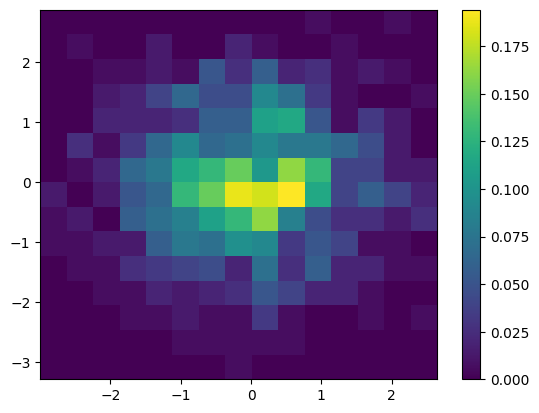

In [8]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True)
plt.colorbar();

We can change which colormap to use by setting the keyword argument `cmap = 'colormap_name'` in the plotting function call.  This sets the colormap not only for the plot, but for the colorbar as well.  In this case, we use the `magma` colormap:

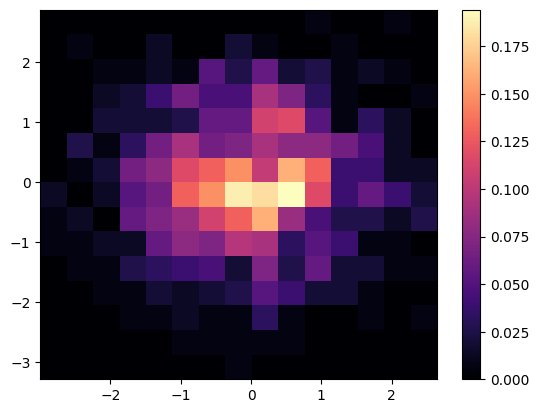

In [9]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True, cmap='magma')
plt.colorbar();

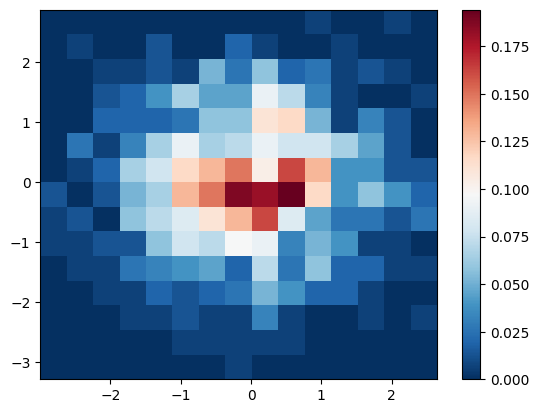

In [20]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True, cmap='RdBu_r') #warming stripes colors
plt.colorbar();

## Shared Colorbars
Oftentimes, you are plotting multiple subplots, or multiple `Axes` objects, simultaneously. In these scenarios, you can create colorbars that span multiple plots, as shown in the following example:

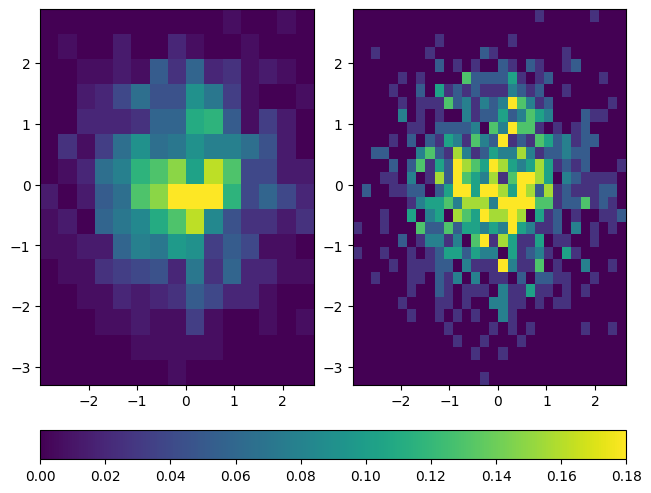

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, vmax=0.18)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, vmax=0.18)

fig.colorbar(hist1[3], ax=ax, location='bottom')

You may be wondering why the call to `fig.colorbar` uses the argument `hist1[3]`. The explanation is as follows: `hist1` is a tuple returned by `hist2d`, and `hist1[3]` contains a `matplotlib.collections.QuadMesh` that points to the colormap for the first histogram. To make sure that both histograms are using the same colormap with the same range of values, `vmax` is set to 0.18 for both plots. This ensures that both histograms are using colormaps that represent values from 0 (the default for histograms) to 0.18. Because the same data values are used for both plots, it doesn't matter whether we pass in `hist1[3]` or `hist2[3]` to `fig.colorbar`.
You can learn more about this topic by reviewing the [`matplotlib.axes.Axes.hist2d` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist2d.html).

In addition, there are many other types of plots that can also share colorbars. An actual use case that is quite common is to use shared colorbars to compare data between filled contour plots. The `vmin` and `vmax` keyword arguments behave the same way for `contourf` as they do for `hist2d`. However, there is a potential downside to using the `vmin` and `vmax` kwargs. When plotting two different datasets, the dataset with the smaller range of values won't show the full range of colors, even though the colormaps are the same. Thus, it can potentially matter which output from `contourf` is used to make a colorbar.  The following examples demonstrate general plotting technique for filled contour plots with shared colorbars, as well as best practices for dealing with some of these logistical issues:

Text(0.5, 0.98, 'Shared colormaps on data with different ranges')

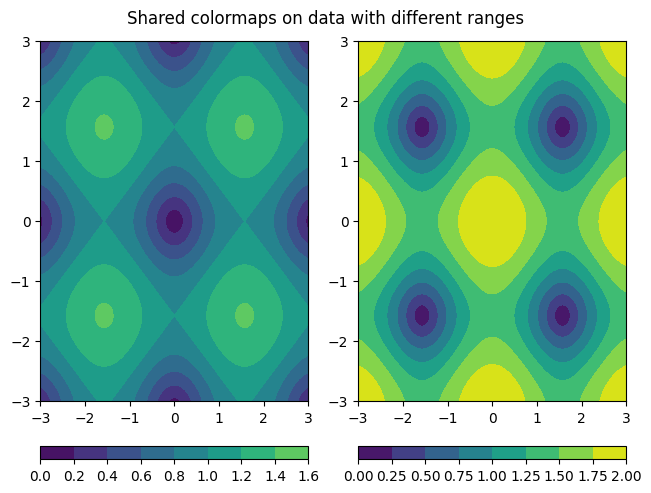

In [22]:
x2 = y2 = np.arange(-3, 3.01, 0.025)
X2, Y2 = np.meshgrid(x2, y2)
Z = np.sqrt(np.sin(X2) ** 2 + np.sin(Y2) ** 2)
Z2 = np.sqrt(2 * np.cos(X2) ** 2 + 2 * np.cos(Y2) ** 2)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
c1 = ax[0].contourf(X2, Y2, Z, vmin=0, vmax=2)
c2 = ax[1].contourf(X2, Y2, Z2, vmin=0, vmax=2)
fig.colorbar(c1, ax=ax[0], location='bottom')
fig.colorbar(c2, ax=ax[1], location='bottom')

fig.suptitle('Shared colormaps on data with different ranges')

Text(0.5, 0.98, 'Using the contourf output from the data with a wider range')

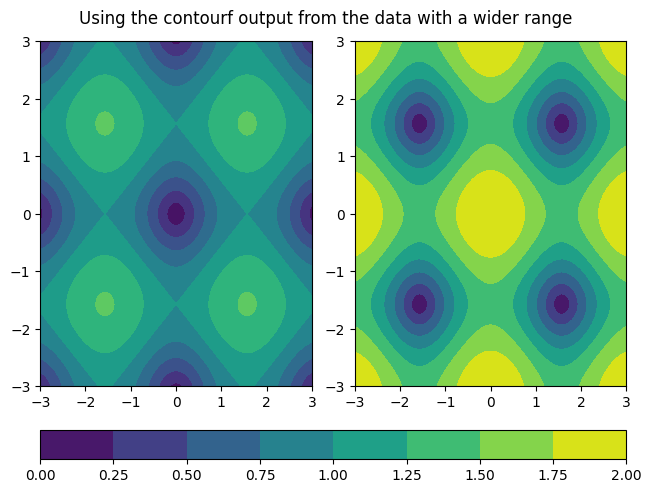

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
c1 = ax[0].contourf(X2, Y2, Z, vmin=0, vmax=2)
c2 = ax[1].contourf(X2, Y2, Z2, vmin=0, vmax=2)
fig.colorbar(c2, ax=ax, location='bottom')

fig.suptitle('Using the contourf output from the data with a wider range')

## Custom Colorbars

Despite the availability of a large number of premade colorbar styles, it can still occasionally be helpful to create your own colorbars.

Below are 2 similar examples of using custom colorbars.

The first example uses a very discrete list of colors, simply named `colors`, and creates a colormap from this list by using the call `ListedColormap`.

The second example uses the function `LinearSegmentedColormap` to create a new colormap, using interpolation and the `colors` list defined in the first example.

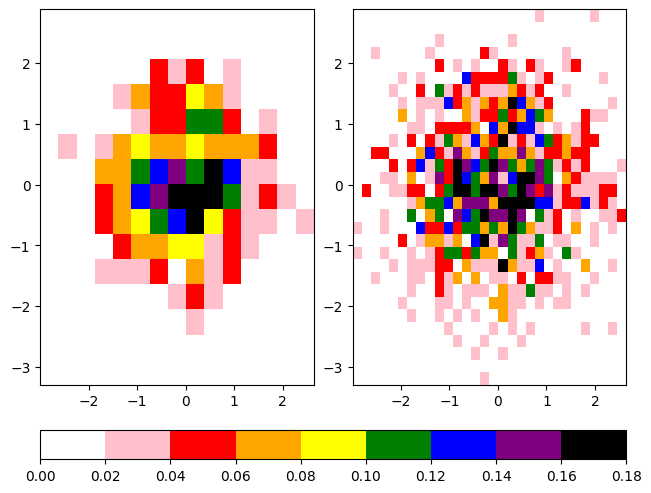

In [24]:
colors = [
    'white',
    'pink',
    'red',
    'orange',
    'yellow',
    'green',
    'blue',
    'purple',
    'black',
]
ccmap = ListedColormap(colors)
norm = Normalize(vmin=0, vmax=0.18)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=ccmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=ccmap, norm=norm)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

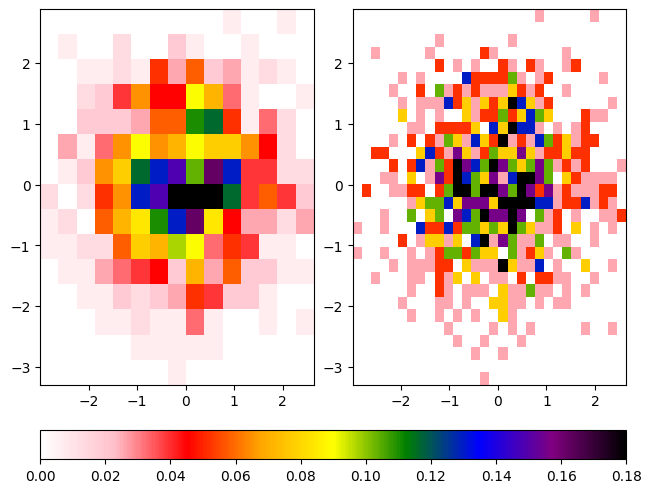

In [25]:
cbcmap = LinearSegmentedColormap.from_list("cbcmap", colors)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

### The `Normalize` Class
Notice that both of these examples contain plotting functions that make use of the `norm` kwarg.  This keyword argument takes an object of the `Normalize` class.  A `Normalize` object is constructed with two numeric values, representing the start and end of the data.  It then linearly normalizes the data in that range into an interval of [0,1]. If this sounds familiar, it is because this functionality was used in a previous histogram example.  Feel free to review any previous examples if you need a refresher on particular topics. In this example, the values of the `vmin` and `vmax` kwargs used in `hist2d` are reused as arguments to the `Normalize` class constructor.  This sets the values of `vmin` and `vmax` as the starting and ending data values for our `Normalize` object, which is passed to the `norm` kwarg of `hist2d` to normalize the data. There are many different options for normalizing data, and it is important to explicitly specify how you want your data normalized, especially when making a custom colormap.

For information on nonlinear and other complex forms of normalization, review this [Colormap Normalization tutorial](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html#).

## Mosaic Subplots
One of the helpful features recently added to Matplotlib is the `subplot_mosaic` method.  This method allows you to specify the structure of your figure using specially formatted strings, and will generate subplots automatically based on that structure.

For example, if we wanted two plots on top, and one on the bottom, we can construct them by passing the following string to `subplot_mosaic`:

```python
""
AB
CC
""
```

This creates three `Axes` objects corresponding to three subplots.  The subplots `A` and `B` are on top of the subplot `C`, and the `C` subplot spans the combined width of `A` and `B`.

Once we create the subplots, we can access them using the dictionary returned by `subplot_mosaic`.  You can specify an `Axes` object (in this example, `your_axis`) in the dictionary (in this example, `axes_dict`) by using the syntax `axes_dict['your_axis']`. A full example of `subplot_mosaic` is as follows:

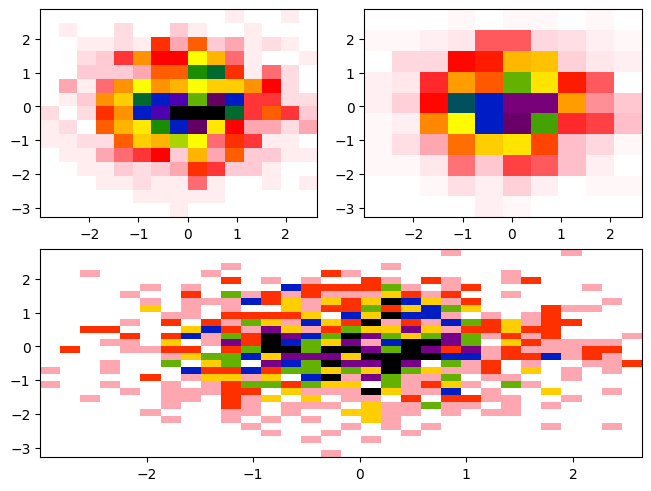

In [26]:
axdict = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CC
    """
)

histA = axdict['A'].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
histB = axdict['B'].hist2d(x, y, bins=10, density=True, cmap=cbcmap, norm=norm)
histC = axdict['C'].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

You'll notice there is not a colorbar plotted by default. When constructing the colorbar, we need to specify the following:
* Which plot to use for the colormapping (ex. `histA`)
* Which subplots (`Axes` objects) to merge colorbars across (ex. [`histA`, `histB`])
* Where to place the colorbar (ex. `bottom`)

/tmp/ipython-input-1337655102.py:12: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 4 Axes> than <Figure size 640x480 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(histA[3], ax=[axdict['A'], axdict['B']], location='bottom')
/tmp/ipython-input-1337655102.py:13: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 5 Axes> than <Figure size 640x480 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(histC[3], ax=[axdict['C']], location='right');


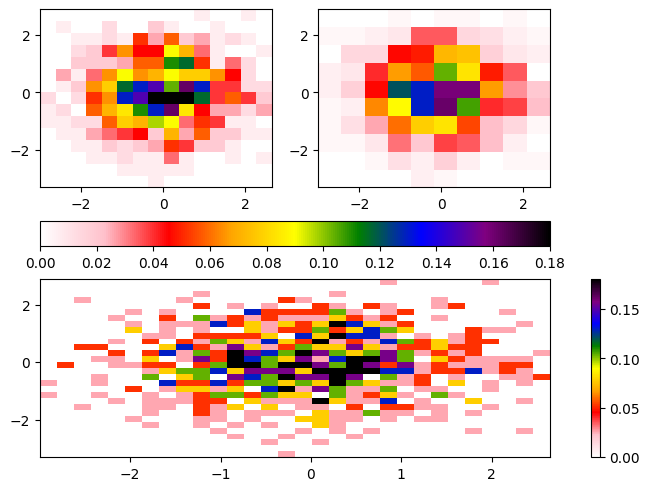

In [27]:
axdict = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CC
    """
)

histA = axdict['A'].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
histB = axdict['B'].hist2d(x, y, bins=10, density=True, cmap=cbcmap, norm=norm)
histC = axdict['C'].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

fig.colorbar(histA[3], ax=[axdict['A'], axdict['B']], location='bottom')
fig.colorbar(histC[3], ax=[axdict['C']], location='right');

---

## Summary
* You can use features in Matplotlib to add text annotations to your plots, including equations in mathematical notation
* There are a number of considerations to take into account when choosing your colormap
* You can create your own colormaps with Matplotlib
* Various subplots and corresponding `Axes` objects in a figure can share colorbars
    
## Additional Resources
- [Matplotlib text documentation](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_math_fontfamily)
- [Matplotlib annotation documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)
- [Matplotlib's annotation examples](https://matplotlib.org/stable/tutorials/text/annotations.html)
- [Writing mathematical expressions in Matplotlib](https://matplotlib.org/stable/tutorials/text/mathtext.html)
- [Mathtext Examples](https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_examples.html#sphx-glr-gallery-text-labels-and-annotations-mathtext-examples-py)
- [Drawing fancy boxes with Matplotlib](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)
- [Plot Types Cheat Sheet](https://lnkd.in/dD5fE8V)
- [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Making custom colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html)
- [Complex figure and subplot composition](https://matplotlib.org/stable/tutorials/provisional/mosaic.html#)
